In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import linalg as LA
%matplotlib inline

In [2]:
mat = plt.imread("./photo.png")


In [3]:
mat.shape

(480, 423)

In [4]:
U, s, VT = LA.svd(mat)

In [5]:
D = np.zeros_like(mat, dtype=float)
D[np.diag_indices(min(mat.shape))] = s

In [6]:
U.shape, s.shape, D.shape, VT.shape

((480, 480), (423,), (480, 423), (423, 423))

### Восстановление

In [7]:
k = 200
mat_approx = U[:, :k] @ D[:k, :k] @ VT[:k, :]

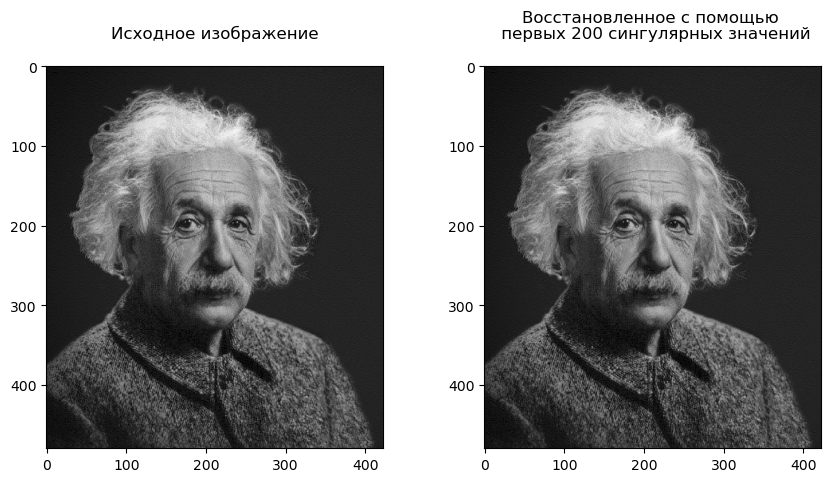

In [8]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,8))
plt.subplots_adjust(wspace=0.3, hspace=0.2)

ax1.imshow(mat, cmap='gray')
ax1.set_title("Исходное изображение", y=1.05)

ax2.imshow(U @ D @ VT, cmap='gray')
ax2.set_title("Восстановленное с помощью \n первых {} сингулярных значений".format(k), y=1.05)

plt.show()

### Поэтапное проявление
Идея. На каждом проходе добавляем по одному слою. 
Сначала первое сингулярное число, потом второе и т.д.

На каждом этапе берутся срезы матриц по одному столбцу/строке и прибавляются к общему результату.
Происходит как бы поэтапное умножение матриц

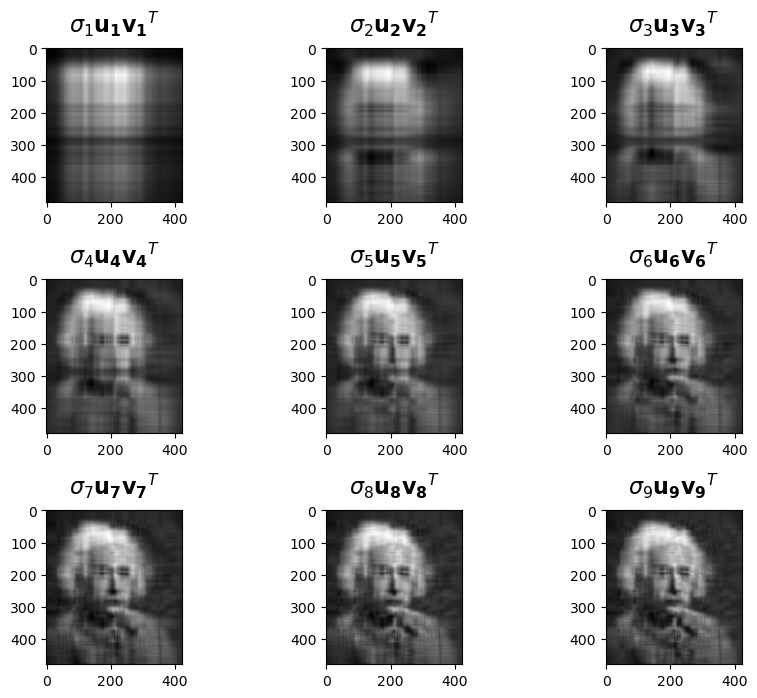

In [12]:
fig, axes = plt.subplots(3, 3, figsize=(10,8))
plt.subplots_adjust(wspace=0.3, hspace=0.5)
# Пустое изображение
mat_i = np.zeros_like(mat)

for i in range(0, 9):
    # Прибавляем очередной срез к изображению
    mat_i = mat_i + s[i] * U[:,i].reshape(-1,1) @ VT[i,:].reshape(1,-1)
    axes[i // 3, i % 3].imshow(mat_i, cmap='gray')
    axes[i // 3, i % 3].set_title("$\sigma_{0}\mathbf{{u_{0}}}\mathbf{{v_{0}}}^T$".format(i+1), y=1.05, fontsize=16)
    
plt.show()